In [2]:
import pandas as pd
from dataset_functions import Dataset_Formatter
from mordred import Calculator, descriptors
from glob import glob
import numpy as np
import rdkit


mk = Dataset_Formatter()
 

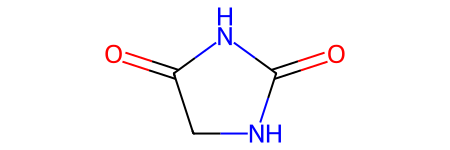

In [20]:
substruct = Chem.MolFromSmiles( 'C1[nH]C(=O)NC1=O')

substruct

In [22]:
from rdkit import Chem
df = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/misc/updated_ChEMBL_dataset.csv', index_col='ID')
df['Canon_SMILES']

# Convert SMILES to RDKit Mol objects and check for substructure match
df['Molecule'] = df['Canon_SMILES'].apply(Chem.MolFromSmiles)
df['Contains_Benzene'] = df['Molecule'].apply(lambda mol: mol.HasSubstructMatch(substruct) if mol else False)

df[df['Contains_Benzene'] == True]


,Unnamed: 0.1,Unnamed: 0,Experimental_pIC50,log_filename,molname,conf_no,affinity_(kcal/mol),CNN_affinity,Canon_SMILES,CNN_usage,...,molecular_structure,n_ar_rings,PFI,M.W,HBD,HBA,Lipinski_HBA,Lipinski_HBD,Molecule,Contains_Benzene
ID,,,,,,,,,,,,,,,,,,,,,


In [10]:
path = "/users/yhb18174/Recreating_DMTA/datasets/held_out_data/"
tg_s = path + 'PMG_held_out_targ_top.csv'
tg_l = path + 'PMG_held_out_targ_trimmed.csv'
tgl = pd.read_csv(tg_l, index_col='ID')
tgs = pd.read_csv(tg_s, index_col='ID')




In [15]:
np.std(tgl['Affinity(kcal/mol)'])


0.5437705552197987

In [16]:
np.std(tgs['Affinity(kcal/mol)'])


0.26529024934965095

In [51]:
files = glob('/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_*.csv.gz')
files

['/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_3.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_4.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_2.csv.gz',
 '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_1.csv.gz']

In [52]:
import re
# Function to extract the number from the file name
def extract_number(file_path):
    match = re.search(r'PMG_rdkit_(\d+)', file_path)
    return int(match.group(1)) if match else float('inf')

# Sort the list using the extracted numbers
sorted_file_paths = sorted(files, key=extract_number)
print(sorted_file_paths)


['/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_1.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_2.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_3.csv.gz', '/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/full_data/PMG_rdkit_4.csv.gz']


In [1]:
for file in sorted_file_paths:
    print(file)
    chunks = pd.read_csv(file, compression='gzip', chunksize=200000)
    for chunk in chunks:
        print(chunk)

NameError: name 'sorted_file_paths' is not defined

In [112]:
# Cleaning up all docking files (resetting to blank)
from glob import glob
for file in glob('/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_*'):
    df = pd.read_csv(file, index_col='ID')
    try:
        df.loc["PMG-483604"] = ''
    except:
        print("not in batch")
   # df['Affinity(kcal/mol)'] = df['Affinity(kcal/mol)'].replace('PD', '')
    #df['Affinity(kcal/mol)'] = ''
    df.to_csv(file, index_label='ID')

In [ ]:
mol_ds = pd.read_csv('/users/yhb18174/Recreating_DMTA/docking/PyMolGen/PMG-810414/PMG-810414_all_scores.csv', index_col='ID')
mol_ds.sort_values(ascending=True, by='Affinity(kcal/mol)')

,Unnamed: 0,conf_no,Pose_no,Affinity(kcal/mol),Intramol(kcal/mol),CNN_Pose_Score,CNN_affinity
ID,,,,,,,
PMG-810414_conf_0_pose_1,0,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,28,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,21,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,15,0,1,-7.84,0.03,0.9649,6.761
PMG-810414_conf_0_pose_1,10,0,1,-7.84,0.03,0.9649,6.761
...,...,...,...,...,...,...,...
PMG-810414_conf_2_pose_1,100,2,1,-7.17,0.40,0.9651,6.850
PMG-810414_conf_2_pose_6,110,2,6,-7.11,0.11,0.9357,6.649
PMG-810414_conf_2_pose_6,116,2,6,-7.11,0.11,0.9357,6.649


In [3]:
sys.path.insert(0, PROJ_DIR + "/scripts/run/")
from analysis_class import Analysis

In [ ]:
molid2batchno(molid="PMG-815266", prefix='PMG-', dataset_file="/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_*")

In [150]:
training_path = "/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/"
targs_df = pd.read_csv(training_path + "dock/new_ChEMBL_docking_df.csv", index_col="ID").drop(columns=['Unnamed: 0'])
targs = targs_df[["Affinity(kcal/mol)"]]
falsetargs = targs_df[targs_df["Affinity(kcal/mol)"] == "False"]
targs = targs.drop(index=falsetargs.index)
chembl_feats = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID')
chembl_feats = chembl_feats.loc[targs.index]

In [23]:
ho_df = pd.read_csv("/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv", index_col="ID").drop(columns=['Unnamed: 0'])
ho = ho_df[["Affinity(kcal/mol)"]]
falseho = ho_df[ho_df["Affinity(kcal/mol)"] == "False"]
ho_ = ho.drop(index=falseho.index)
ho_feats = pd.read_csv("/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_desc.csv", index_col='ID')
ho_feats = ho_feats.loc[ho_.index]


In [91]:
preds = rf_model.predict(new_feat_df)

In [92]:
ho_['pred_Affinity(kcal/mol)'] = preds

In [139]:
ho_ds = pd.DataFrame(ho_['Affinity(kcal/mol)'])

In [152]:
ho_ds.to_csv('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_targ_trimmed.csv', index_label='ID')

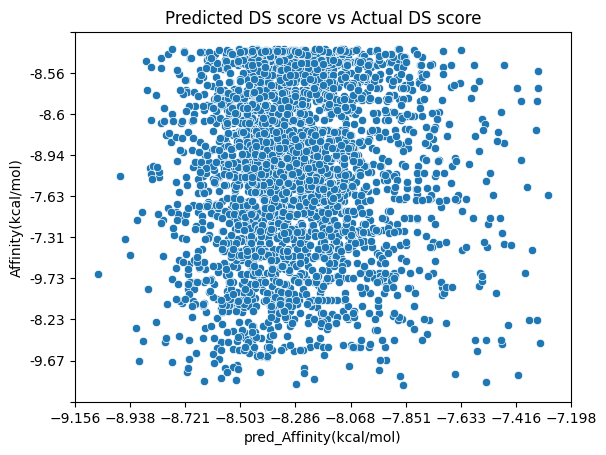

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



# Example data
# Assuming ho_ is your DataFrame and has columns 'pred_Affinity(kcal/mol)' and 'Affinity(kcal/mol)'
# If ho_ is not defined, replace with your actual data
x = ho_['pred_Affinity(kcal/mol)']
y = ho_['Affinity(kcal/mol)']

# Create scatter plot
sns.scatterplot(data=ho_, x='pred_Affinity(kcal/mol)', y='Affinity(kcal/mol)')

# Calculate R^2 value
r2 = r2_score(y, x)

# Get current axis
ax = plt.gca()

# Set ticks for x and y axes
x_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 10)
y_ticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 10)

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

ax.set_title('Predicted DS score vs Actual DS score')

# Show plot
plt.savefig('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/init_preds_vs_actual.png')

In [117]:
save = ho_.drop(columns=["Affinity(kcal/mol)"])
save.to_csv('~/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/held_out_test/held_out_test_preds.csv', index_label='ID')

In [127]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
true = ho_['Affinity(kcal/mol)'].astype(float)
pred = ho_['pred_Affinity(kcal/mol)'].astype(float)

errors = true - pred

# Calculate performance metrics
bias = np.mean(errors)
sdep = (np.mean((true - pred - (np.mean(true - pred))) ** 2)) ** 0.5
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
r2 = r2_score(true, pred)

dict = {
    'Bias' : round(bias,3),
    'SDEP': round(sdep,3),
    'MSE': round(mse, 3),
    'RMSE': round(rmse, 3),
    'r2': round(r2, 3)
}

In [131]:
import json
with open('/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0/held_out_test/held_out_stats.json', 'w') as file:
    json.dump(dict, file, indent=4)

In [136]:
from rdkit import Chem
import random

docking_df = pd.read_csv('/users/yhb18174/Recreating_DMTA/datasets/held_out_data/PMG_held_out_docked.csv', index_col='ID')
docking_smi = docking_df['SMILES']
random.sample(docking_smi, 10)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

In [10]:
import pandas as pd
import numpy as np
chembl_path = "/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/desc/rdkit/ChEMBL_rdkit_desc_trimmed.csv"
original_df = pd.read_csv(chembl_path, index_col='ID')
original_ids = original_df.index.tolist()


In [12]:
values = original_df.values.flatten()

In [17]:
shuffled = np.random.permutation(values)
scrambled_df =pd.DataFrame(shuffled.reshape(original_df.shape), index = original_ids, columns=original_df.columns)


In [22]:
scrambled_df.index.name='ID'

In [2]:
scrambled_df.to_csv("/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/desc/rdkit/ChEMBL_scrambled_feats.csv", index_label='ID')

NameError: name 'scrambled_df' is not defined

In [13]:
ho_dir = '/users/yhb18174/Recreating_DMTA/datasets/held_out_data/'
ho_df = pd.read_csv(ho_dir + '/PMG_held_out_targ_trimmed.csv', index_col='ID')
sorted_ho_df = ho_df.sort_values(by='Affinity(kcal/mol)', ascending=True).head(500)


In [21]:
ho_dfd = pd.read_csv(ho_dir + '/PMG_held_out_desc_trimmed.csv', index_col='ID')
ho_dfd = ho_dfd.loc[sorted_ho_df.index]
ho_dfd.to_csv(ho_dir + '/PMG_held_out_desc_top.csv', index_label='ID')


In [27]:
full_data = pd.read_csv(ho_dir + '/PMG_rdkit_full.csv', index_col='ID')
full_data = full_data.loc[ho_dfd.index]
full_data.to_csv(ho_dir + '/PMG_held_out_full_top.csv', index_label='ID')

In [4]:
import pandas as pd
from glob import glob

In [19]:
docking_results_ls = glob(f"/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/docking/PMG_docking_*.csv")
feature_results_ls = glob("/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/PMG_rdkit_desc_*.csv")

global_docking_df = pd.DataFrame()
for docking_file in docking_results_ls:
    df = pd.read_csv(docking_file, index_col="ID")
    df = df.sort_values(by="Affinity(kcal/mol)")
    print(len(df))
    global_docking_df = pd.concat([global_docking_df, df])

print(len(global_docking_df))

100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100000
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100001
100000
62069
100001
100001
3062097


In [20]:
global_docking_df = pd.to_numeric(global_docking_df["Affinity(kcal/mol)"], errors='coerce').dropna().to_frame()
global_docking_df = global_docking_df.sort_values(by="Affinity(kcal/mol)")
print(len(global_docking_df))

97289


In [21]:
final_len = int(len(global_docking_df) * 0.01)
global_docking_df = global_docking_df.head(final_len)
print(f"Top-docked size (final_len): {final_len}")


Top-docked size (final_len): 972


In [22]:
global_docking_df

,Affinity(kcal/mol)
ID,
PMG-2351043,-11.82
PMG-1874490,-11.66
PMG-2874449,-11.66
PMG-969803,-11.32
PMG-654249,-11.32
...,...
PMG-1244211,-10.14
PMG-483708,-10.14
PMG-1488655,-10.14


In [27]:
def molid2batchno(molid: str, prefix: str, dataset_file: str, chunksize: int = 100000):
    """
    Description
    -----------
    Function to get the batch which the molecule is in from its ID

    Parameters
    ----------
    molid (str)         ID of a molecule
    prefix (str)        Prefix of the molecule ID
    dataset_file (str)  Common filename of dataset
    chunksize (int)    Number of molecules per batch

    Returns
    -------
    Batch number which the molecule with molid is in
    """
    import re

    # Extract the molecule number from its ID
    mol_no = molid.replace(prefix, "")
    mol_no = int(mol_no)

    # List and sort files
    file_ls = glob(dataset_file)
    file_ls.sort(key=lambda x: int(re.search(r"\d+", x).group()))

    # Determine the batch number
    batch_number = (mol_no - 1) // chunksize + 1

    # Check if batch number exceeds number of available files
    if batch_number > len(file_ls):
        raise ValueError(
            f"Batch number {batch_number} exceeds the number of available dataset files."
        )

    return batch_number


In [40]:
df_copy = global_docking_df.copy()

df_copy['batch_no'] = [molid2batchno(molid=id, prefix="PMG-", dataset_file="/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/PMG_rdkit_desc_*.csv")
                        for id in df_copy.index]

df_copy = df_copy.sort_values(by="batch_no")


In [50]:
feat_df = pd.DataFrame()
for batch_no in df_copy["batch_no"].unique():
    file_path = f"/users/yhb18174/Recreating_DMTA/datasets/PyMolGen/desc/rdkit/PMG_rdkit_desc_{batch_no}.csv"
    try:
        batch_df = pd.read_csv(file_path, index_col='ID')

        print(batch_df.columns)
        grouped_df = df_copy[df_copy["batch_no"] == batch_no]
        print(grouped_df)

        matched_rows = batch_df[batch_df.index.isin(grouped_df.index)]
        print(matched_rows)
        feat_df = pd.concat([feat_df, matched_rows])

        # Do something with batch_df...
    except FileNotFoundError:
        print(f"File not found for batch {batch_no}: {file_path}")

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons',
       ...
       'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane',
       'fr_urea', 'SPS.1'],
      dtype='object', length=211)
           Affinity(kcal/mol)  batch_no
ID                                     
PMG-11709              -10.47         1
PMG-59286              -10.30         1
PMG-7888               -10.45         1
PMG-70508              -10.93         1
PMG-53314              -10.41         1
PMG-24695              -10.47         1
PMG-7472               -10.65         1
PMG-74234              -10.14         1
PMG-15715              -10.37         1
PMG-34582              -10.14         1
PMG-43970              -10.45         1
PMG-72949              -10.19         1
PMG-64763              -10.16         1
   

In [52]:
feat_df.to_csv("/users/yhb18174/Recreating_DMTA/datasets/hits/hits_features.csv", index_label='ID')
global_docking_df.to_csv("/users/yhb18174/Recreating_DMTA/datasets/hits/hits_targets.csv", index_label='ID')